In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing relevant libraries(numerical & visual) need for EDA

In [3]:
data=pd.read_csv('loan.csv')
#importing dataset

c:\Users\mash1006\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
s=data.shape
n=data.isnull().sum()
#checking the shape of dataset to know of no. of drivers available & checking the no. of null enteries in the dataset as part of data cleaning process 

In [5]:
data1=data.dropna(axis=1,how='all')#dropping all the columns whose all values are null or missing & putting in new dataframe
n1=data1.isnull().sum() #storing the sum of null values of all the columns which have partially missing values


In [6]:
data2=data1.drop(data.columns[[10,11,51,19,28,29,47,4,34,18,32,15,7,46,40,41,51]],axis=1)#dropping all the columns based on domain knowledge, irrelavant on basis on problem & data dictionary
n2=data2.isnull().sum()#storing the sum of null values of all the columns which have partially missing values

In [7]:
nan=float('NaN') #creating a float NaN value that will be replaced with null values or 0
data2.replace(0,nan,inplace=True)
data2.replace('NA',nan,inplace=True)
data3=data2.dropna(axis=1,thresh=21000)#dropping all the columns from 2nd data frame with keeping a threshold 21000 or more null values & putting into 3rd dataframe
data3=data3.drop(['title','zip_code','id','application_type','grade','member_id','open_acc',"revol_util",'last_credit_pull_d','term','pymnt_plan','addr_state','earliest_cr_line','initial_list_status','funded_amnt','last_pymnt_d','total_pymnt','total_pymnt_inv'],axis=1)#dropping all the columns from 3rd datafram based on domain knowledge, irrelavant on basis on problem & data dictionary
n3=data3.isnull().sum()
#replacing null values with NaN & dropping irrelavant drivers on the basis of their deifnition and correlation matrix fromed through heatmap showing above

In [8]:
for i in data3.columns:
    print(i,data3[i].nunique())
#to get the info for uniques values in the individual drivers shortlisted so as to segregate into categorical & continous variables

loan_amnt 885
int_rate 371
sub_grade 35
home_ownership 5
annual_inc 5318
verification_status 3
loan_status 3
purpose 14
dti 2867


In [9]:
cat_col=['sub_grade','home_ownership','verification_status','loan_status','purpose']
cont_col=['int_rate','dti','loan_amnt']
#segrating continous & categorical drives from dataframe 3 for plotting purpose

In [10]:
data3.dtypes
#understanding the datatype for ploting purpose after shorlisting relevant drivers as per the problem statement


loan_amnt                int64
int_rate                object
sub_grade               object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
dtype: object

In [11]:
data3['int_rate']=data3['int_rate'].str.replace('%','').astype(float)#removing special character from int_rate so as to convert into float for corelation matrix
n3=data3.isnull().sum()

In [12]:
data3['sub_grade']=data3['sub_grade'].astype(str)
data3['verification_status']=data3['verification_status'].astype(str)
data3['loan_status']=data3['loan_status'].astype(str)
#conversion of relevant drivers from data frame 3 to correct data type

In [13]:
dti=data3['dti'].mean()#calculation the mean of DTI 
data3['dti']=data3['dti'].replace(np.nan,dti)#replacing the NaN values of dti driver with mean as there no outliers & data of dti is quite stationary & if would have be too volatile or with outliers we would have replaced the null values with median


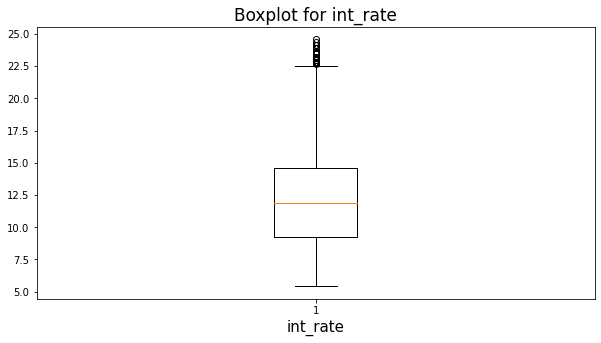

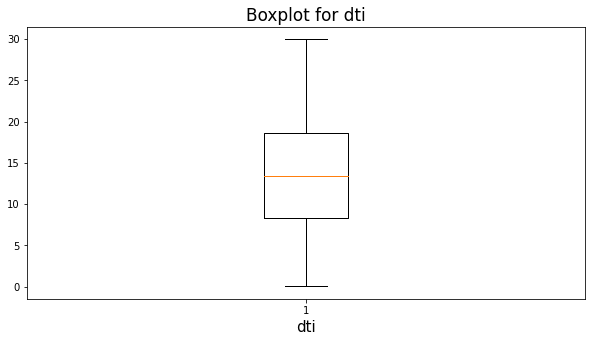

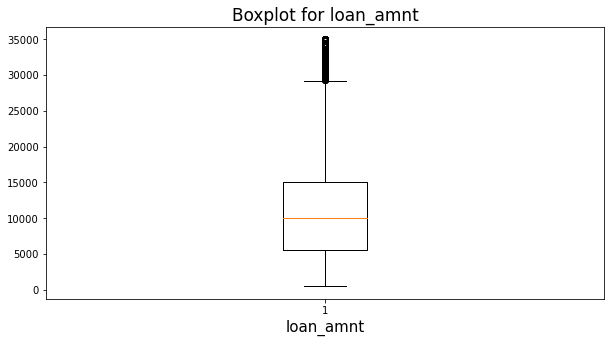

In [14]:
for i in cont_col:
    plt.figure(figsize=(10,5)))#fixing the figure size of the plot
    plt.boxplot(data3[i])#running command for multiple box plot for categorical variable
    plt.title("Boxplot for "+i,size=17) #setting the title for each box plot
    plt.xlabel(i,fontsize=15)#fixing the label size of x axis driver
    plt.show()

#ploting multiple boxplots for continous drivers to have an understanding of outliers 

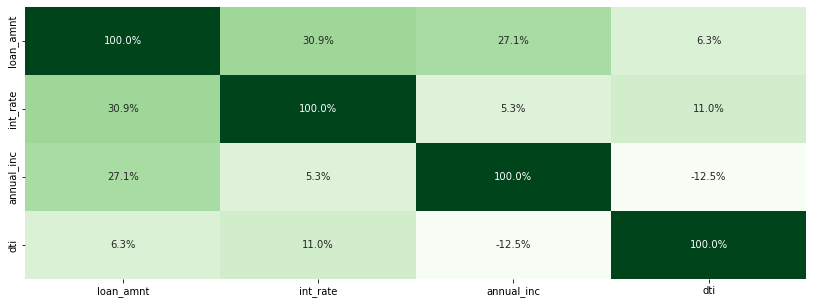

In [15]:
plt.figure(figsize = (14,5)) #fixing the figure size of the plot
sns.heatmap(data3.corr(),annot=True,cmap='Greens',fmt='.1%',cbar=False)#running command for heatmap for correlation of continous variable
plt.show()
#correlation matrix formed through heatmap to understand the correlation of continous variables & there relevance

**Insights**

As we can clearly see that int_rate & annual_income has good correlation with loan amount.

**Recommenation**

Loan amount is one of the relevant driver to understand the requirement of the consumer & interest rate and annual income are the other driver that can clearly justify that is the client is going to default on the applied loan amount as they are correlated. 
DTI is another driver that has been shortlisted as the relevant driver as it helps to understand FOIR or the current financial stability based upon his current obligations & income even if it is not have good correlation with any of the other drivers.



c:\Users\mash1006\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


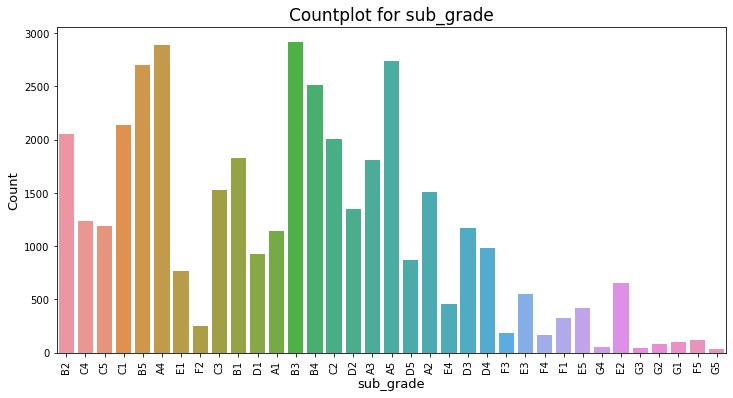

c:\Users\mash1006\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


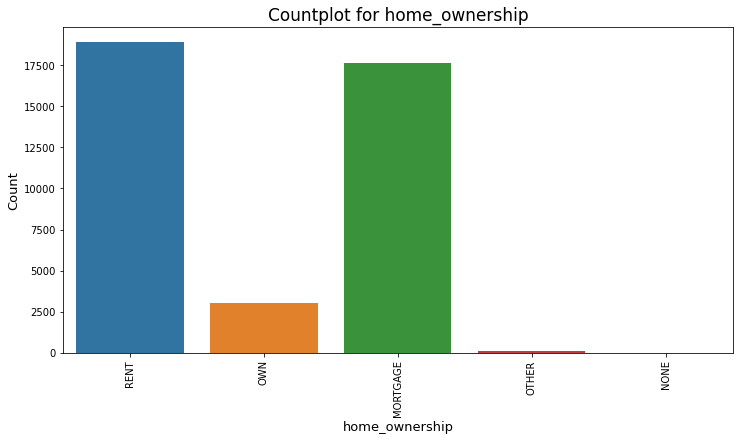

c:\Users\mash1006\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


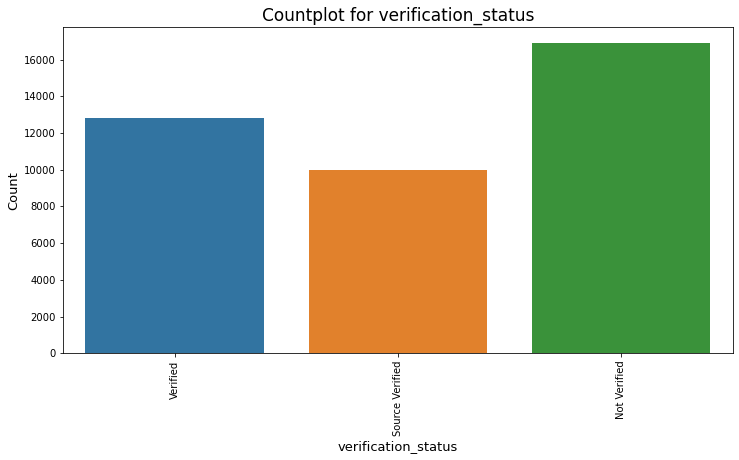

c:\Users\mash1006\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


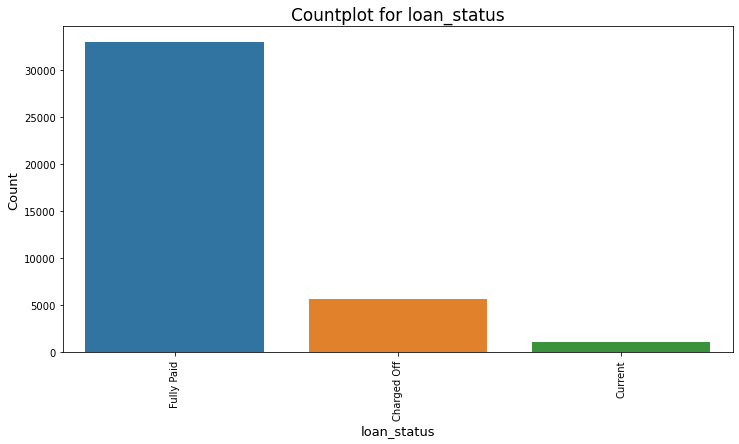

c:\Users\mash1006\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


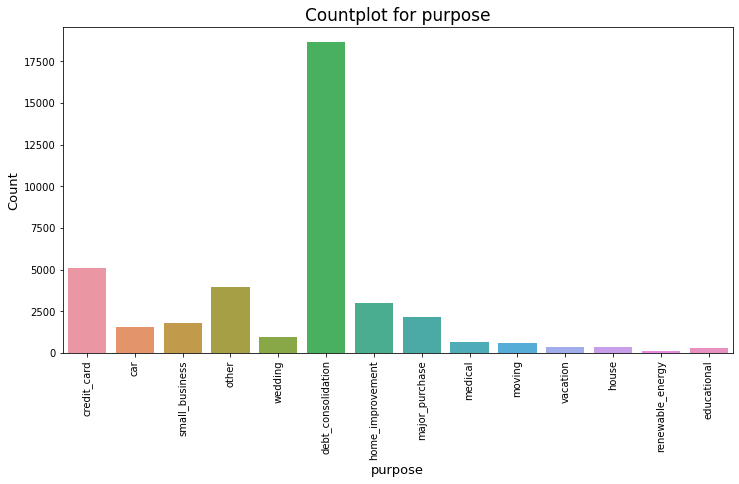

In [19]:
for i in cat_col:
    plt.figure(figsize=(12,6))#fixing the figure size of the plot
    sns.countplot(data3[i])#running command for multiple count plot for categorical variable
    plt.title("Countplot for "+i,size=17) #setting the title for each count plot
    plt.xticks(rotation=90) #rortation of x axis ticks 
    plt.xlabel(i,fontsize=13)#fixing the label size of x axis driver
    plt.ylabel('Count',fontsize=13)##fixing the label size of y axis Count
    plt.show()

#plotting multiplecount plots for categorical variables to understand their relevance & get meaningful insights


**Insights**
1. *Sub_Grade:* It shows majority of the applicants are having a loan grade & sub grade of B5, B4, B3, B4, A5 which gives a valuable info on the quality of applicants.
2. *House Ownership:* It shows that majority of the applicants are either in rented house or in mortgage house which shows either they dont have strong income to own a house or already having a huge financial obligation.
3. *Verification Status:* It shows majority of the applicants are not verified which is a red flag or signal to keep an eye on other drivers for a better understanding of his authenticity of income or source of income.
4. *Loan Status:* It shows majority of the applicants are fully paid but some followed with charged-off so it gives an valuable insight about the financial stabiltiy & debt repaying discipline
5. *Purpose:* It shows majority of the applicants applying for the purpose of debt consolidation which shows high amount of applicants are finding it tough to pay their current obligations which is a red flag or signal to keep an eye on other drivers for a better understanding of the applicant financial scenarios.

**Recommenation**
1. *Sub_Grade:* It has been shortlisted one of important categorical driver over grade as it gives the info of both loan grades & its sub grades. 
2. *House Ownership:* It has been considered as an important driver as it shows if an applicant has a financial asset that can used in case of default to recover the loan & if a person is in mortgage then there is already a financial obligation on the applicant & if applicant is on rent then it shows that client doesn't have a strong income to own a house.
3. *Verification Status:* It is an important driver as it gives an insight about the applicant authenticity & if income was verified by LC, not verified, or if the income source was verified 
4. *Loan Status:* It is a very important driver to consider applicant scenario as if the applicant has fully paid there is chance that he might not default on the loan & if the applicant has been charged off it means there is chance he has financial irregularities or was not discipline in paying off his debts. This can be used with other drivers to get a complete picture of the applicant financial stability.
5. *Purpose:* It is a important driver or more of a factor that needs to be understood as this will be help to understand the client intention & implementation of loan amount is in fruitful purpose or not. 

**All the above selected drivers needs to ananlysed parallel or integration of each other rather than independently as it will all the driver together will give clear & a better picture of the applicant financial scenario which will clearly indicate that chances of client defaulting on a particular loan or not.**